#Handling Text
Handling text in machine learning refers to the process of preparing and processing textual data to be used as input for machine learning algorithms. It involves various techniques and steps, including:

1. Text Cleaning: This involves removing unwanted characters, punctuation, and special symbols from the text. It may also include tasks like lowercasing, stemming, and lemmatization to normalize the text.

2. Tokenization: It is the process of breaking down the text into smaller units called tokens. Tokens can be words, phrases, or even individual characters, depending on the requirements.

3. Stopword Removal: Stopwords are commonly used words (e.g., "the," "is," "and") that do not carry significant meaning. Removing stopwords helps reduce noise in the text data.

4. Vectorization: Text data needs to be converted into numerical representations for machine learning algorithms to process. Common techniques for vectorization include bag-of-words (BoW), term frequency-inverse document frequency (TF-IDF), and word embeddings like Word2Vec or GloVe.

5. Feature Engineering: It involves extracting additional features from text data that can enhance the performance of machine learning models. This may include features like word count, character count, n-grams, or sentiment analysis.

6. Handling Imbalanced Text Data: In text classification tasks, it is common to have imbalanced classes where some categories have more samples than others. Techniques like oversampling, undersampling, or using class weights can be employed to address this issue.

7. Model Selection and Evaluation: After preprocessing the text data, appropriate machine learning algorithms can be selected, such as Naive Bayes, Support Vector Machines (SVM), or Recurrent Neural Networks (RNNs). Model performance can be evaluated using metrics like accuracy, precision, recall, and F1 score.

It's important to note that the specific steps and techniques used for handling text data can vary depending on the nature of the problem and the available resources.

## Textual Data
Textual data can be categorised to rwo main differnet types: Structured Text and Unstructured Text.

- **Structured Text**: Structured text typically follows a specific schema or template, making it easily readable and interpretable by machines. Examples of structured text include data stored in spreadsheets, databases, or CSV files.

- **Unstructured Text**: Unstructured text, on the other hand, refers to text data that does not have a predefined structure or format. Examples of unstructured text include social media posts, emails, news articles, blog posts, and customer reviews.

#Hands-On Exercises

The exercises are from the [textbook](https://www.oreilly.com/library/view/machine-learning-with/9781491989371/)

##Problem 1
##1.1 Text Cleaning


Most text data will need to be cleaned before we can use it to build features. Most basic text cleaning can be completed using Python’s standard string operations. In the real world we will most likely define a custom cleaning function (e.g., capitalizer) combining some cleaning tasks and apply that to the text data.

In this problesm, we have some unstructured text data and want to complete some basic cleaning.


In [ ]:
# Create text
text_data = ["   Interrobang. By Aishwarya Henriette     ",
                 "Parking And Going. By Karl Gautier",
                 "    Today Is The night. By Jarek Prakash   "]

# Show text
text_data

['   Interrobang. By Aishwarya Henriette     ',
 'Parking And Going. By Karl Gautier',
 '    Today Is The night. By Jarek Prakash   ']

In [ ]:
# Strip whitespaces
strip_whitespace = [string.strip() for string in text_data]

# Show text
strip_whitespace

['Interrobang. By Aishwarya Henriette',
 'Parking And Going. By Karl Gautier',
 'Today Is The night. By Jarek Prakash']

In [ ]:
# Remove periods
remove_periods = [string.replace(".", "") for string in strip_whitespace]

# Show text
remove_periods

['Interrobang By Aishwarya Henriette',
 'Parking And Going By Karl Gautier',
 'Today Is The night By Jarek Prakash']

Create and apply a custom transformation function:

In [ ]:
# Create function
def capitalizer(string: str) -> str: return string.upper()

In [ ]:
# Apply function
[capitalizer(string) for string in remove_periods]

['INTERROBANG BY AISHWARYA HENRIETTE',
 'PARKING AND GOING BY KARL GAUTIER',
 'TODAY IS THE NIGHT BY JAREK PRAKASH']

Let's use [regular expressions](http://bit.ly/2HTGZuu) to make powerful string operations.

Regex, short for Regular Expression, is a sequence of characters that forms a search pattern. It is a powerful tool used for pattern matching and text manipulation in various programming languages. It allows you to search, match, and extract specific patterns of text based on predefined rules and symbols.

In [ ]:
# Import library
import re

# Create function
def replace_letters_with_X(string: str) -> str: return re.sub(r"[a-zA-Z]", "X", string)

# Apply function
[replace_letters_with_X(string) for string in remove_periods]

['XXXXXXXXXXX XX XXXXXXXXX XXXXXXXXX',
 'XXXXXXX XXX XXXXX XX XXXX XXXXXXX',
 'XXXXX XX XXX XXXXX XX XXXXX XXXXXXX']

##1.2 Parsing and Cleaning HTML

Suppose you have text data with `HTML` elements and want to extract just the text. You can use Beautiful `Soup`’s extensive set of options to parse and extract from `HTML`

In [ ]:
# Load library
from bs4 import BeautifulSoup

# Create some HTML code
html = """
           <div class='full_name'><span style='font-weight:bold'>
           Masego</span> Azra</div>"
           """

#show html
html

'\n           <div class=\'full_name\'><span style=\'font-weight:bold\'>\n           Masego</span> Azra</div>"\n           '

Despite the strange name, [Beautiful Soup](http://bit.ly/2pwZcYs) is a powerful Python library designed for scraping HTML. Typically Beautiful Soup is used scrape live websites, but we can just as easily use it to extract text data embedded in HTML. The full range of Beautiful Soup operations is beyond the scope of this book, but even the few methods used in our solution show how easily we can parse HTML code to extract the data we want.

In [ ]:
# Parse html
soup = BeautifulSoup(html, "lxml")


In [ ]:
# Find the div with the class "full_name", show text
soup.find("div", { "class" : "full_name" }).text

'\n           Masego Azra'

##1.3 Removing Punctuation

You have a feature of text data and want to remove punctuation.

In [ ]:
# Load libraries
import unicodedata
import sys

# Create text
text_data = ['Hi!!!! I. Love. This. Song....',
                 '10000% Agree!!!! #LoveIT',
                 'Right?!?!']

#show text
text_data

['Hi!!!! I. Love. This. Song....', '10000% Agree!!!! #LoveIT', 'Right?!?!']

In [ ]:
# Create a dictionary of punctuation characters
punctuation = dict.fromkeys(i for i in range(sys.maxunicode)
  if unicodedata.category(chr(i)).startswith('P'))


In [ ]:
# For each string, remove any punctuation characters
[string.translate(punctuation) for string in text_data]

['Hi I Love This Song', '10000 Agree LoveIT', 'Right']

**Discussion**

The `translate` method in Python is widely used for its exceptional speed. In our approach, we started by constructing a dictionary called `punctuation` that contains all punctuation characters based on Unicode. We then used this dictionary to translate any characters in the string that match the punctuation characters into None, effectively eliminating them. While there are more readable methods to remove punctuation, this somewhat unconventional solution offers the advantage of significantly faster execution compared to alternative approaches.

##1.4 Tokenizing Text

In this section of the problem we have text and want to break it up into individual words. We will use Natural Language Toolkit for Python (NLTK) which has a powerful set of text manipulation operations, including word tokenizing.

Tokenization, particularly word tokenization, is a standard procedure performed after cleaning textual data. This step serves as the initial stage in converting the text into a structured format that can be utilized to create meaningful features.

In [ ]:
# Load library
from nltk.tokenize import word_tokenize

# Create text
string = "The science of today is the technology of tomorrow"

#show text
string

'The science of today is the technology of tomorrow'

In [ ]:
# punkt is a nltk library tool for tokenizing text documents.
#When we use an old or a degraded version of nltk module we
#generally need to download the remaining data .You can do:

nltk.download('punkt')


import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Error loading corpus: Package 'corpus' not found in index
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['The', 'science', 'of', 'today', 'is', 'the', 'technology', 'of', 'tomorrow']

In [ ]:
# Tokenize words
word_tokenize(string)

['The', 'science', 'of', 'today', 'is', 'the', 'technology', 'of', 'tomorrow']

We can also tokenize into sentences:

In [ ]:
# Load library
from nltk.tokenize import sent_tokenize

# Create text
string = "The science of today is the technology of tomorrow. Tomorrow is today."

# Tokenize sentences
sent_tokenize(string)

['The science of today is the technology of tomorrow.', 'Tomorrow is today.']

## 1.5 Removing Stop Words

Given tokenized text data, you want to remove extremely common words (e.g., a, is, of, on) that contain little informational value.

We use NLTK’s stopwords:

In [ ]:
# Load library
from nltk.corpus import stopwords

# You will have to download the set of stop words the first time
# import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Create word tokens
tokenized_words = ['i',
                       'am',
                       'going',
                       'to',
                       'go',
                       'to',
                       'the',
                       'store',
                       'and',
                       'park']

#show text
tokenized_words

['i', 'am', 'going', 'to', 'go', 'to', 'the', 'store', 'and', 'park']

In [ ]:
# Load stop words
stop_words = stopwords.words('english')

In [ ]:
# Remove stop words
[word for word in tokenized_words if word not in stop_words]

['going', 'go', 'store', 'park']

**Discussion**

While “stop words” can refer to any set of words we want to remove before process‐ ing, frequently the term refers to extremely common words that themselves contain little information value. NLTK has a list of common stop words that we can use to find and remove stop words in our tokenized words:

In [ ]:
# Show stop words
stop_words[:5]

['i', 'me', 'my', 'myself', 'we']

**Note** that NLTK’s stopwords assumes the tokenized words are all lowercased.

##1.6 Stemming Words

Stemming reduces a word to its stem by identifying and removing affixes (e.g., gerunds) while keeping the root meaning of the word. For example, both “tradition” and “traditional” have “tradit” as their stem, indicating that while they are different words they represent the same general concept. By stemming our text data, we transform it to something less readable, but closer to its base meaning and thus more suitable for comparison across observations. NLTK’s `PorterStemmer` implements the widely used [Porter stemming algorithm](http://bit.ly/2FB5ZZb) to remove or replace common suffixes to produce the word stem.

You have tokenized words and your task id to convert them into their root forms. You can use NLTK’s PorterStemmer:

In [ ]:
# Load library
from nltk.stem.porter import PorterStemmer

# Create word tokens
tokenized_words = ['i', 'am', 'humbled', 'by', 'this', 'traditional', 'meeting']

In [ ]:
# Create stemmer
porter = PorterStemmer()


<PorterStemmer>

In [ ]:
# Apply stemmer
[porter.stem(word) for word in tokenized_words]

['i', 'am', 'humbl', 'by', 'thi', 'tradit', 'meet']

##1.7 Tagging Parts of Speech
Tagging parts of speech is the process of assigning grammatical labels or tags to words in a sentence based on their syntactic roles. It involves categorizing words into classes such as nouns, verbs, adjectives, adverbs, pronouns, prepositions, conjunctions, and more. Part-of-speech tagging helps in understanding the grammatical structure of a sentence and can be used as a preliminary step for various natural language processing tasks like text analysis, information retrieval, and machine translation.



In this part of the text cleaning problem, you have text data and your task is to tag each word or character with its part of speech. To perform this task you can use NLTK’s pre-trained parts-of-speech tagger:

In [ ]:
# Load libraries
from nltk import pos_tag
from nltk import word_tokenize

nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


KeyboardInterrupt: ignored

In [ ]:
# Create text
text_data = "Chris loved outdoor running"

In [ ]:
# if run to error
#nltk.download()

In [ ]:
# Use pre-trained part of speech tagger
text_tagged = pos_tag(word_tokenize(text_data))

The output is a list of tuples with the word and the tag of the part of speech. NLTK uses the [Penn Treebank](http://bit.ly/2HROPo5) parts for speech tags. Some examples of the Penn Treebank tags are:

**Tag Part of speech**

NNP Proper noun, singular

NN Noun, singular or mass

RB Adverb

VBD Verb, past tense

VBG Verb, gerund or present participle

JJ Adjective


PRP Personal pronoun

In [ ]:
# Show parts of speech
text_tagged

Once the text has been tagged, we can use the tags to find certain parts of speech. For example, here are all nouns:

In [ ]:
# Filter words
[word for word, tag in text_tagged if tag in ['NN','NNS','NNP','NNPS'] ]

## 1.8 Encoding Text as a Bag of Words

In this part, suppose you have text data and want to create a set of features indicating the number of times an observation’s text contains a particular word. You can use scikit-learn’s `CountVectorizer`:

In [ ]:
# Load library
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Create text
text_data = np.array(['I love Brazil. Brazil!',
                          'Sweden is best',
                          'Germany beats both'])

In [ ]:
# Create the bag of words feature matrix
count = CountVectorizer()
bag_of_words = count.fit_transform(text_data)

bag_of_words

The resulting output is a sparse array, which is commonly used when dealing with a large volume of text data. In our simplified example, we can convert it to a dense array using the `toarray` function to obtain a matrix representing the count of words for each observation.

In [ ]:
bag_of_words.toarray()

By utilizing the `vocabulary_` method, we can access the corresponding word for each feature in the dataset.

In [ ]:
# Show feature names
count.get_feature_names()

To provide clarity, let's take a look at the feature matrix where the column names represent the words. Each row in the matrix corresponds to a single observation.


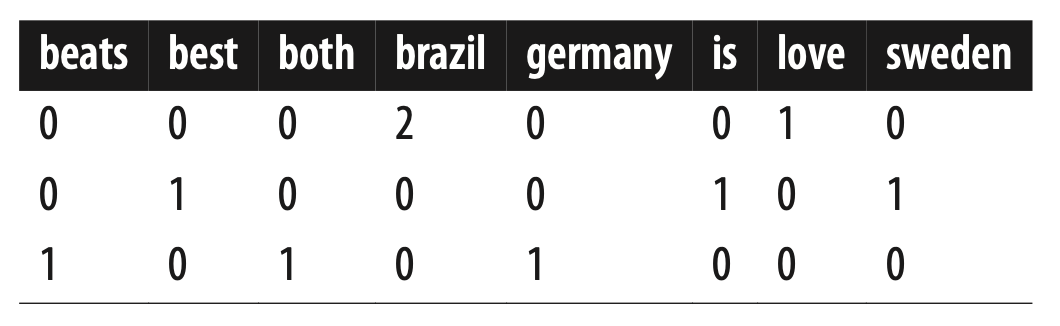

**Discussion**

A commonly used technique for converting text into features is the bag-of-words model. This model assigns a feature to each unique word in the text data and counts the number of occurrences of each word in each observation. For instance, in our solution, the sentence "I love Brazil. Brazil!" would have a count of 2 for the feature "brazil" since the word "brazil" appears twice.


## 1.9 Weighting Word Importance
Suppose we want a bag of words, but with words weighted by their importance to an observation.

Compare the frequency of the word in a document (a tweet, movie review, speech transcript, etc.) with the frequency of the word in all other documents using term frequency-inverse document frequency (tf-idf). scikit-learn makes this easy with TfidfVectorizer:

In [ ]:
# Load libraries
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Create text
text_data = np.array(['I love Brazil. Brazil!',
                          'Sweden is best',
                          'Germany beats both'])


In [ ]:
# Create the tf-idf feature matrix
tfidf = TfidfVectorizer()
feature_matrix = tfidf.fit_transform(text_data)

In [ ]:
# Show tf-idf feature matrix
feature_matrix

<3x8 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [ ]:
# Show tf-idf feature matrix as dense matrix
feature_matrix.toarray()

array([[0.        , 0.        , 0.        , 0.89442719, 0.        ,
        0.        , 0.4472136 , 0.        ],
       [0.        , 0.57735027, 0.        , 0.        , 0.        ,
        0.57735027, 0.        , 0.57735027],
       [0.57735027, 0.        , 0.57735027, 0.        , 0.57735027,
        0.        , 0.        , 0.        ]])

`vocabulary_` shows us the word of each feature:

In [ ]:
# Show feature names
tfidf.vocabulary_

{'love': 6,
 'brazil': 3,
 'sweden': 7,
 'is': 5,
 'best': 1,
 'germany': 4,
 'beats': 0,
 'both': 2}

**Discussion**

The more a word appears in a document, the more likely it is important to that document. For example, if the word economy appears frequently, it is evidence that the document might be about economics. We call this term frequency (*tf*).
In contrast, if a word appears in many documents, it is likely less important to any individual document. For example, if every document in some text data contains the word after then it is probably an unimportant word. We call this document frequency (*df*).

By combining these two statistics, we can assign a score to every word representing how important that word is in a document. Specifically, we multiply tf to the inverse of document frequency (*idf*):

*tf‐idf (t,d) =tf (t,d) ×idf (t)*

where *t* is a word and *d* is a document.


##Problem 2
##Handling Images
Image classification is a fascinating field in machine learning that enables computers to identify patterns and objects in images. Before applying machine learning algorithms to images, we typically need to preprocess the raw images and convert them into usable features. The widely used Open Source Computer Vision Library (OpenCV) is a powerful tool for handling images, offering extensive documentation and popularity among developers.

The book will use a set of images as examples, which are available to download on [GitHub](https://github.com/chrisalbon/simulated_datasets).

## 2.1 Loading Images
Let's load an image for preprocessing. We use use OpenCV’s `imread`:

In [ ]:
# Load library
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# Load image as grayscale
image = cv2.imread("./data/dataset-cover.jpg  ", cv2.IMREAD_GRAYSCALE)

If we want to view the image, we can use the Python plotting library Matplotlib:

TypeError: ignored

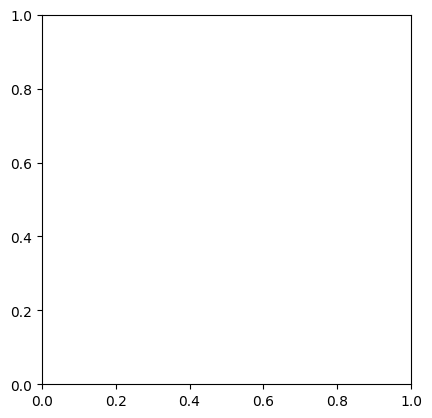

In [ ]:
# Show image
plt.imshow(image, cmap="gray"), plt.axis("off")
plt.show()

Fundamentally, images are data and when we use imread we convert that data into a data type we are very familiar with—a NumPy array:

In [ ]:
# Show data type
type(image)

NoneType

We have transformed the image into a matrix whose elements correspond to individ‐ ual pixels. We can even take a look at the actual values of the matrix:

In [ ]:
# Show image data
image

The resolution of our image was 3600 × 2270, the exact dimensions of our matrix:

In [ ]:
# Show dimensions
image.shape

What does each element in the matrix actually represent? In grayscale images, the value of an individual element is the pixel intensity. Intensity values range from black (0) to white (255). For example, the intensity of the top-rightmost pixel in our image has a value of 140:

In [ ]:
# Show first pixel
image[0,0]

In the matrix, each element contains three values corresponding to blue, green, red values (BGR):

In [ ]:
# Load image in color
image_bgr = cv2.imread("./data/dataset-cover.jpg", cv2.IMREAD_COLOR)

# Show pixel
image_bgr[0,0]

One small caveat: by default OpenCV uses BGR, but many image applications— including Matplotlib—use red, green, blue (RGB), meaning the red and the blue values are swapped. To properly display OpenCV color images in Matplotlib, we need to first convert the color to [RGB](http://bit.ly/2FxZjKZ) (apologies to hardcopy readers):

In [ ]:
# Convert to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

## 2.2 Saving Images
In this part, your task is to save an image for preprocessing. You can use OpenCV’s imwrite.

Using OpenCV's `imwrite` function allows us to save images to a specified file path. The image format is determined by the extension of the filename (e.g., .*jpg*, .*png*). It is important to note that `imwrite` will overwrite existing files without displaying an error message or requesting confirmation, so caution should be exercised when using this function.

In [ ]:
# Load libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt


# Load image as grayscale
image = cv2.imread("../data/plane.jpg", cv2.IMREAD_GRAYSCALE)

# Save image
cv2.imwrite("./data/plane_new.jpg", image)

## 2.3 Resizing Images
Resizing images is a common preprocessing task in machine learning to ensure consistent dimensions and reduce memory usage. However, it can result in information loss as the image matrix is reduced in size. Common image sizes for machine learning include 32x32, 64x64, 96x96, and 256x256.

In this task we want to resize an image for further preprocessing, we can use `resize` to change the size of an image:

In [ ]:
# Load image
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# Load image as grayscale
image = cv2.imread("./data/plane.jpg", cv2.IMREAD_GRAYSCALE)

In [ ]:
# Resize image to 50 pixels by 50 pixels
image_50x50 = cv2.resize(image, (50, 50))

In [ ]:
# View image
plt.imshow(image_50x50, cmap="gray"), plt.axis("off")
plt.show()

## 2.4 Cropping Images

In OpenCV, image cropping is performed by selecting specific rows and columns from the image matrix. This allows us to keep only the desired portion of the image. Cropping is beneficial when we want to focus on a specific area of interest in every image, such as in the case of stationary security camera footage.

For this task, we want to remove the outer portion of the image to change its dimensions.

Solution: The image is encoded as a two-dimensional NumPy array, so we can crop the image easily by slicing the array:

In [ ]:
# Load image
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# Load image in grayscale
image = cv2.imread("./data/plane.jpg", cv2.IMREAD_GRAYSCALE)

# Select first half of the columns and all rows
image_cropped = image[:,:128]

In [ ]:
# Show image
plt.imshow(image_cropped, cmap="gray"), plt.axis("off")
plt.show()

## 2.5 Blurring Images
In this section your task is to smooth out an image.

To achieve image blurring, the average value of neighboring pixels is calculated and assigned to each pixel. This process involves using a mathematical representation called a kernel, which defines the neighboring pixels and the specific operation performed. The size of the kernel determines the extent of blurring, with larger kernels resulting in smoother images. In this example, we apply blurring by averaging the values within a 5 × 5 kernel surrounding each pixel.

In [ ]:
# Load libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image as grayscale
image = cv2.imread("./data/plane.jpg", cv2.IMREAD_GRAYSCALE)

# Blur image
image_blurry = cv2.blur(image, (5,5))

# Show image
plt.imshow(image_blurry, cmap="gray"), plt.axis("off")
plt.show()

To highlight the effect of kernel size, here is the same blurring with a 100 × 100 kernel:

In [ ]:
# Blur image
image_very_blurry = cv2.blur(image, (100,100))

# Show image
plt.imshow(image_very_blurry, cmap="gray"), plt.xticks([]), plt.yticks([])
plt.show()

## 2.6 Sharpening Images
Sharpening operates in a similar manner to blurring, but with the intention of enhancing image details instead of reducing them. Instead of using a kernel to average neighboring values, a specialized kernel is created to emphasize the central pixel. This process enhances the contrast of edges, making them more pronounced in the image.

To perform the task of sharpening an image, create a kernel that highlights the target pixel. Then apply it to the image using fil ter2D:

In [ ]:
# Load libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# Load image as grayscale
image = cv2.imread("./data/plane.jpg", cv2.IMREAD_GRAYSCALE)

# Create kernel
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

In [ ]:
# sharpen image
image_sharp = cv2.filter2D(image, -1, kernel)

# Show image
plt.imshow(image_sharp, cmap="gray"), plt.axis("off")
plt.show()

## 2.7 Enhancing Contrast

Your task is to increase the contrast between pixels in an image.

Histogram equalization is an image processing technique that enhances the visibility of objects and shapes. When working with grayscale images, we can directly apply OpenCV's "equalizeHist" function to the image to achieve this effect.

In [ ]:
# Load libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image
image = cv2.imread("./data/plane.jpg", cv2.IMREAD_GRAYSCALE)

# Enhance image
image_enhanced = cv2.equalizeHist(image)

# Show image
plt.imshow(image_enhanced, cmap="gray"), plt.axis("off")
plt.show()

In the case of a color image, it is necessary to convert the image to the YUV color format. The Y component represents the brightness or luma, while the U and V components represent the color information. Once the conversion is done, we can apply the equalizeHist function to the image and then convert it back to the BGR or RGB color format.

In [ ]:
# Load image
image_bgr = cv2.imread("./data/plane.jpg")

# Convert to YUV
image_yuv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2YUV)

# Apply histogram equalization
image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0])

# Convert to RGB
image_rgb = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)

# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

## 2.8 Isolating Colors

To isolate a color in an image, define a range of colors and then apply a mask to the image:

In [ ]:
# Load libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image
image_bgr = cv2.imread('./data/plane.jpg')

# Convert BGR to HSV
image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)

# Define range of blue values in HSV
lower_blue = np.array([50,100,50])
upper_blue = np.array([130,255,255])

# Create mask
mask = cv2.inRange(image_hsv, lower_blue, upper_blue)

# Mask image
image_bgr_masked = cv2.bitwise_and(image_bgr, image_bgr, mask=mask)

# Convert BGR to RGB
image_rgb = cv2.cvtColor(image_bgr_masked, cv2.COLOR_BGR2RGB)

# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

In [ ]:
# we create a mask for the image (we will only keep the white areas):
# Show image
plt.imshow(mask, cmap='gray'), plt.axis("off")
plt.show()

## 2.9 Binarizing Images


Binarizing images in machine learning refers to the process of converting grayscale or color images into binary images, where each pixel is assigned either a black or white value. This is typically done by applying a thresholding technique.

Thresholding is a technique used to convert pixel intensities above a certain value to white and those below the value to black. Adaptive thresholding is a more advanced method where the threshold value for a pixel is determined based on the intensities of its neighboring pixels. This approach is particularly useful in situations where lighting conditions vary across different areas of an image.

In [ ]:
# Load libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image as grayscale
image_grey = cv2.imread("./data/plane.jpg", cv2.IMREAD_GRAYSCALE)

# Apply adaptive thresholding
max_output_value = 255
neighborhood_size = 99
subtract_from_mean = 10
image_binarized = cv2.adaptiveThreshold(image_grey,
                                            max_output_value,
                                            cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                            cv2.THRESH_BINARY,

                                            neighborhood_size,
                                            subtract_from_mean)

# Show image
plt.imshow(image_binarized, cmap="gray"), plt.axis("on")
plt.show()

## 2.10 Removing Backgrounds

In this part of the image handling problem your task is to isolate the foreground of an image.
To perfom this,  you need to mark a rectangle around the desired foreground, then run the GrabCut algorithm:

In [ ]:
# Load library
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# Load image and convert to RGB
image_bgr = cv2.imread('./data/plane.jpg')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Rectangle values: start x, start y, width, height
rectangle = (250, 0, 1256, 1256)

# Create initial mask
mask = np.zeros(image_rgb.shape[:2], np.uint8)

# Create temporary arrays used by grabCut
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Run grabCut
cv2.grabCut(image_rgb,              # Our image
            mask,                   # The Mask
            rectangle,              # Our rectangle
            bgdModel,               # Temporary array for background
            fgdModel,               # Temporary array for background
            5,                      # Number of iterations
            cv2.GC_INIT_WITH_RECT)  # Initiative using our rectangle

# Create mask where sure and likely backgrounds set to 0, otherwise 1
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

# Multiply image with new mask to subtract background
image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]

# Show image
plt.imshow(image_rgb_nobg), plt.axis("off")
plt.show()

In [ ]:
# Show mask
plt.imshow(mask, cmap='gray'), plt.axis("off")
plt.show()

In [ ]:
# Show mask
plt.imshow(mask_2, cmap='gray'), plt.axis("off")
plt.show()

## 2.11 Detecting Edges

Edge detection is a prominent area of focus in computer vision, aiming to identify boundaries between objects in an image. These boundaries, or edges, carry significant information as they represent areas of high contrast or changes in intensity. By detecting edges, we can distinguish important features from less informative regions, such as homogeneous backgrounds. Various techniques exist for edge detection, including Sobel filters and the Laplacian edge detector, each offering different approaches to highlight these informative boundaries.

In this part of the problem, we use an edge detection technique like the Canny edge detector to find the edges in an image:

In [ ]:
# Load library
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image as grayscale
image_gray = cv2.imread("./data/plane.jpg", cv2.IMREAD_GRAYSCALE)

# Calculate median intensity
median_intensity = np.median(image_gray)

# Set thresholds to be one standard deviation above and below median intensity
lower_threshold = int(max(0, (1.0 - 0.33) * median_intensity))
upper_threshold = int(min(255, (1.0 + 0.33) * median_intensity))

# Apply canny edge detector
image_canny = cv2.Canny(image_gray, lower_threshold, upper_threshold)

# Show image
plt.imshow(image_canny, cmap="gray"), plt.axis("off")
plt.show()

## 2.12 Detecting Corners

To detect the corners of an image, we use OpenCV’s implementation of the Harris corner detector, cornerHarris.

The Harris corner detector is a widely used technique for identifying corner points, which are regions of high information in an image. It operates by examining windows or patches of pixels and detecting significant changes in their content when the window is slightly moved. The cornerHarris function, used for this purpose, has three important parameters: `block_size` determines the size of the neighboring region for corner detection, `aperture` refers to the size of the Sobel kernel used, and a free parameter controls the sensitivity for detecting corners, with larger values indicating softer corners.

In [ ]:
# Load libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image as grayscale
image_bgr = cv2.imread("./data/plane.jpg")
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
image_gray = np.float32(image_gray)

# Set corner detector parameters
block_size = 2
aperture = 29
free_parameter = 0.04

# Detect corners
detector_responses = cv2.cornerHarris(image_gray,
                                          block_size,
                                          aperture,
                                          free_parameter)
# Large corner markers
detector_responses = cv2.dilate(detector_responses, None)

# Only keep detector responses greater than threshold, mark as white
threshold = 0.02
image_bgr[detector_responses >
              threshold *
              detector_responses.max()] = [255,255,255]

# Convert to grayscale
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

# Show image
plt.imshow(image_gray, cmap="gray"), plt.axis("off")
plt.show()


##2.13 Creating Features for Machine Learning

You want to convert an image into an observation for machine learning. To do so, use NumPy’s flatten to convert the multidimensional array containing an image’s data into a vector containing the observation’s values:

In [ ]:

# Load image
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image as grayscale
image = cv2.imread("./data/plane.jpg", cv2.IMREAD_GRAYSCALE)

# Resize image to 10 pixels by 10 pixels
image_10x10 = cv2.resize(image, (10, 10))

# Convert image data to one-dimensional vector
image_10x10.flatten()

**Discussion**

Images are presented as a grid of pixels. If an image is in grayscale, each pixel is pre‐ sented by one value (i.e., pixel intensity: 1 if white, 0 if black). For example, imagine we have a 10 × 10–pixel image:

In [ ]:
plt.imshow(image_10x10, cmap="gray"), plt.axis("off")
plt.show()

In this case the dimensions of the images data will be 10 × 10:

In [ ]:
image_10x10.shape

And if we flatten the array, we get a vector of length 100 (10 multiplied by 10):

In [ ]:
image_10x10.flatten().shape

This is the feature data for our image that can be joined with the vectors from other images to create the data we will feed to our machine learning algorithms.

If the image is in color, instead of each pixel being represented by one value, it is rep‐ resented by multiple values (most often three) representing the channels (red, green, blue, etc.) that blend to make the final color of that pixel. For this reason, if our 10 × 10 image is in color, we will have 300 feature values for each observation:

In [ ]:
# Load image in color
image_color = cv2.imread("./data/plane.jpg", cv2.IMREAD_COLOR)

# Resize image to 10 pixels by 10 pixels
image_color_10x10 = cv2.resize(image_color, (10, 10))

# Convert image data to one-dimensional vector, show dimensions
image_color_10x10.flatten().shape

One of the major challenges of image processing and computer vision is that since every pixel location in a collection of images is a feature, as the images get larger, the number of features explodes

In [ ]:
# Load image in grayscale
image_256x256_gray = cv2.imread("./data/plane.jpg", cv2.IMREAD_GRAYSCALE)

# Convert image data to one-dimensional vector, show dimensions
image_256x256_gray.flatten().shape

And the number of features only intensifies when the image is in color:

In [ ]:
# Load image in color
image_256x256_color = cv2.imread("./data/plane.jpg", cv2.IMREAD_COLOR)

# Convert image data to one-dimensional vector, show dimensions
image_256x256_color.flatten().shape

As demonstrated in the output, a compact color image already encompasses approximately 200,000 features. This can pose challenges during model training since the number of features may greatly surpass the number of observations available, leading to potential issues.